# Phase variation using Hilbert transform

## First, required libraries are loaded

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import signal
#plt.style.use('dark_background') #uncomment for sensitive eyes
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (12, 7)

## Artificial signal method test

Let's compute a 6 year oscillating sinusoidal signal (in blue) to test the instantaneous frequency values resulting from the Hilbert transform.  
Also, let's do a second signal, copy of the first but with some delay added in the signal (in red) (delay = 5 years)

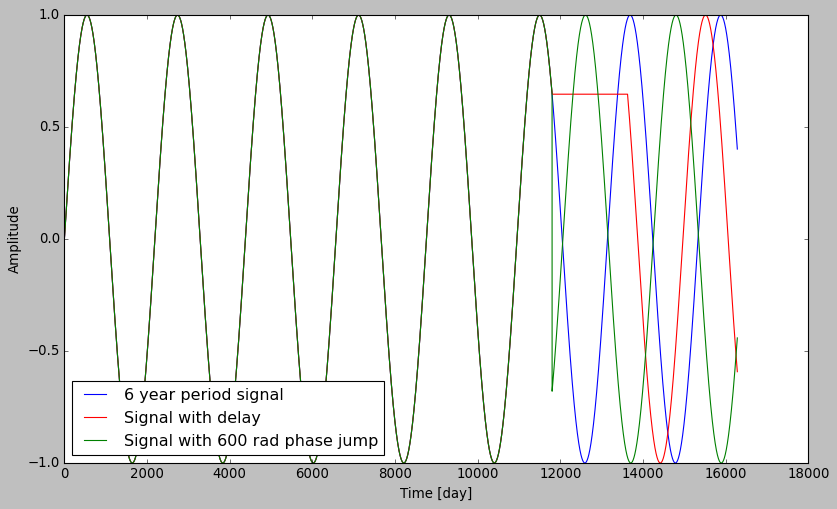

In [2]:
vsize = 16282 #size of the LOD data vector
x = np.arange(vsize)
targetf = 1/(365*6) # 6 year period oscillation
y = np.sin(2*math.pi*targetf*x)
delay = 5*365
delayed = y[11800]*np.ones(delay);
ydelay = np.concatenate((y[0:11800],delayed,y[11800:-delay]))
phijump = 600
yjump = np.concatenate((np.sin(2*math.pi*targetf*x[:11800]),np.sin(2*math.pi*targetf*x[11800:]+phijump)))
plt.plot(x,y,'b', label = '6 year period signal')
plt.plot(x,ydelay,'r', label = 'Signal with delay');
plt.plot(x,yjump,'g', label = f'Signal with {phijump} rad phase jump')
plt.xlabel('Time [day]')
plt.ylabel('Amplitude')
plt.legend(loc="lower left");

Now, let's compute the Hilbet transform of both signals and see the resulting enveloppe and instantaneous frequency

In [3]:
#Phase change detection on original sinusoid
hil_y = signal.hilbert(y)
#Amplitude envelope
a_y = np.abs(hil_y)
#Phase variation
phi_y = np.unwrap(np.angle(hil_y)) #Angle returns the angle formed by the imaginary vector, unwrap allows continuity between -pi an pi
phi_y = np.gradient(phi_y,1) #gradient will compute the variation of the signal (= N(+1) - N(-1) / 2*step)

#Same computaion is made on delayed sinusoid
hil_yd = signal.hilbert(ydelay)
#Amplitude envelope
a_yd = np.abs(hil_yd)
#Phase variation
phi_yd = np.unwrap(np.angle(hil_yd))
phi_yd = np.gradient(phi_yd,1)

#Same computaion is made on phase jump sinusoid
hil_yj = signal.hilbert(yjump)
#Amplitude envelope
a_yj = np.abs(hil_yj)
#Phase variation
phi_yj = np.unwrap(np.angle(hil_yj))
phi_yj = np.gradient(phi_yj,1)

Plot the results:  
The enveloppe shape changed with the delayed added in the signal (as expected)

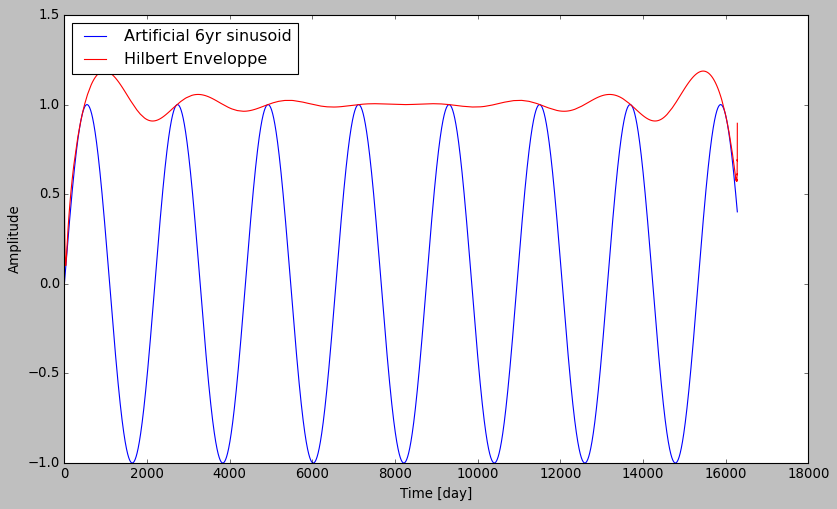

In [4]:
plt.plot(x,y, c = 'b', label = 'Artificial 6yr sinusoid')
plt.plot(x,a_y, c='r', label = 'Hilbert Enveloppe')
plt.xlabel('Time [day]')
plt.ylabel('Amplitude')
plt.legend(loc="upper left");

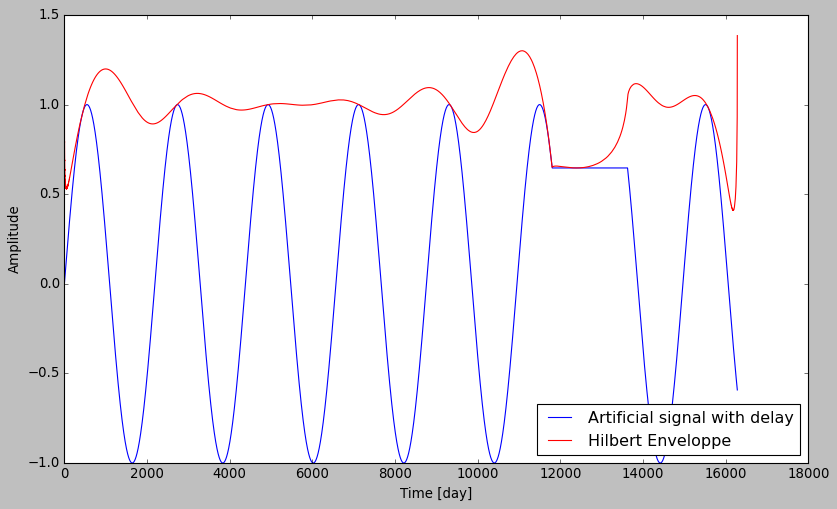

In [5]:
plt.plot(x,ydelay, c = 'b', label = 'Artificial signal with delay')
plt.plot(x,a_yd, c='r', label = 'Hilbert Enveloppe')
plt.xlabel('Time [day]')
plt.ylabel('Amplitude')
plt.legend(loc="lower right");

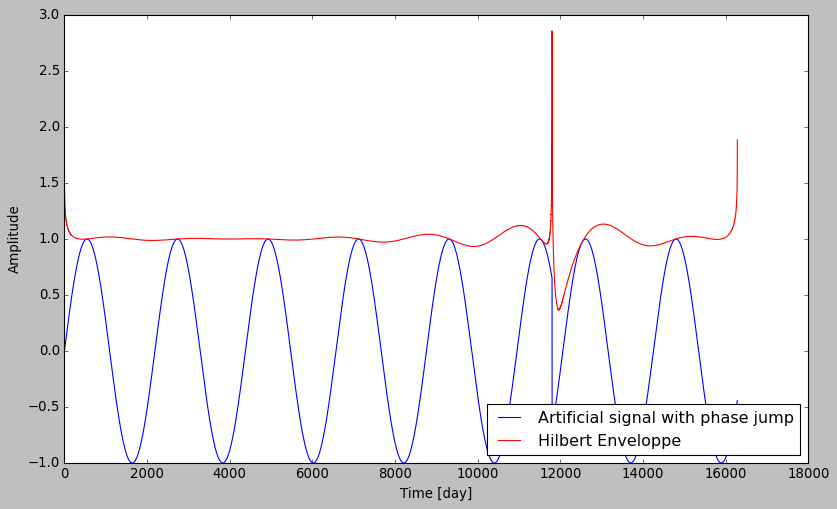

In [6]:
plt.plot(x,yjump, c = 'b', label = 'Artificial signal with phase jump')
plt.plot(x,a_yj, c='r', label = 'Hilbert Enveloppe')
plt.xlabel('Time [day]')
plt.ylabel('Amplitude')
plt.legend(loc="lower right");

Now, let's plot the instantaneous frequency variation for both signals and see the results of the method:

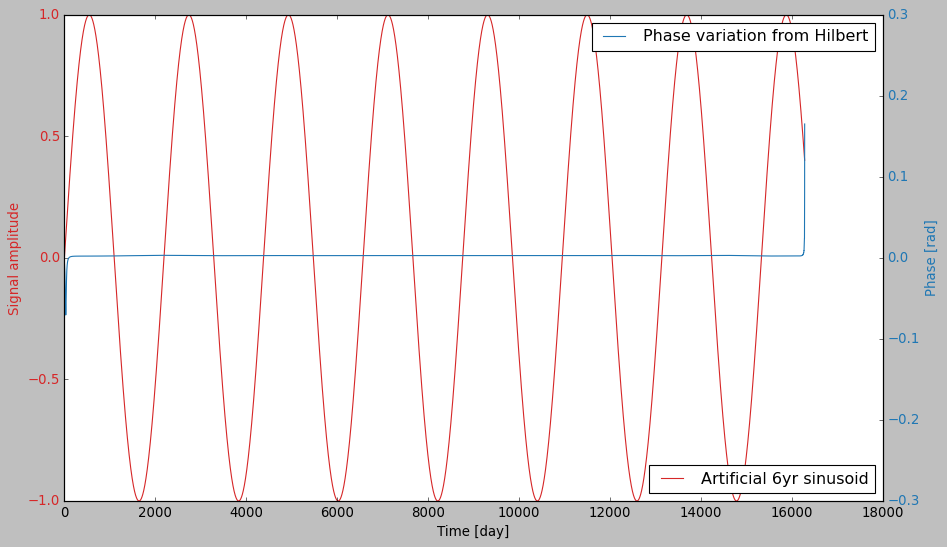

In [7]:
#Plot results
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_ylabel('Signal amplitude', color=color)
ax1.plot(x, y, color=color, label = 'Artificial 6yr sinusoid')
ax1.tick_params(axis='y', labelcolor=color)
plt.xlabel('Time [day]')
plt.legend(loc=4);

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Phase [rad]', color=color)  # we already handled the x-label with ax1
ax2.plot(x, phi_y, color=color, label = 'Phase variation from Hilbert')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((-0.3, 0.3))
ax2.legend(loc=0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

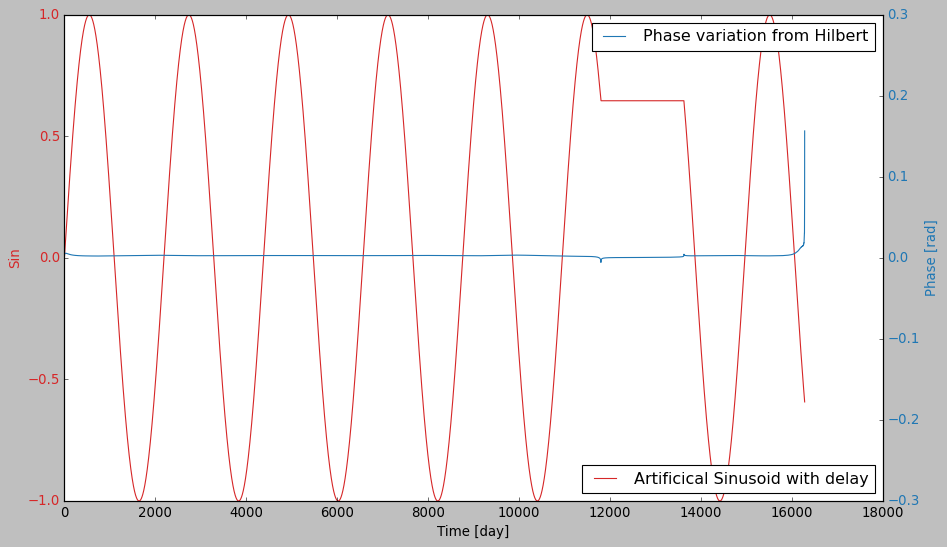

In [8]:
#Plot results
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_ylabel('Sin', color=color)
ax1.plot(x, ydelay, color=color, label = 'Artificical Sinusoid with delay')
ax1.tick_params(axis='y', labelcolor=color)
plt.xlabel('Time [day]')
plt.legend(loc=4);

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Phase [rad]', color=color)  # we already handled the x-label with ax1
ax2.plot(x, phi_yd, color=color, label = 'Phase variation from Hilbert')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((-0.3, 0.3))
ax2.legend(loc=0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

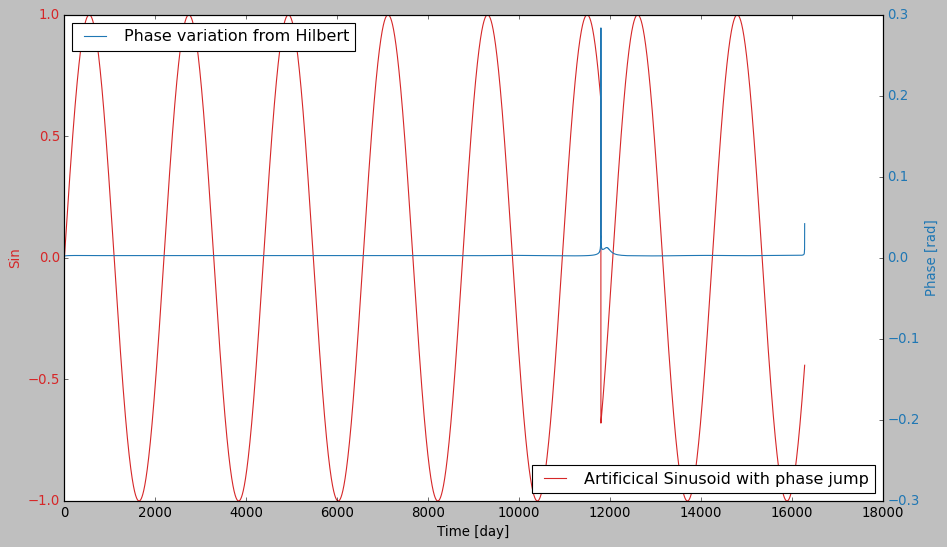

In [9]:
#Plot results
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_ylabel('Sin', color=color)
ax1.plot(x, yjump, color=color, label = 'Artificical Sinusoid with phase jump')
ax1.tick_params(axis='y', labelcolor=color)
plt.xlabel('Time [day]')
plt.legend(loc=4);

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Phase [rad]', color=color)  # we already handled the x-label with ax1
ax2.plot(x, phi_yj, color=color, label = 'Phase variation from Hilbert')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((-0.3, 0.3))
ax2.legend(loc=0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The phase variation computed from the Hilbert transform is way higher for the signal with a phase jump compared to the signal with a phase delay (the three of them are plotted with the same y scale)